# US Accidents - Exploratory Data Analysis

In [1]:
# Import the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [2]:
import pandas as pd

accidents = pd.read_csv('/content/US_Accidents.csv', encoding='utf-8')
print(accidents)

                ID  Severity        Start_Time          End_Time  Start_Lat  \
0        A-2716600         3  08-02-2016 00:37  08-02-2016 06:37  40.108910   
1        A-2716601         2  08-02-2016 05:56  08-02-2016 11:56  39.865420   
2        A-2716602         2  08-02-2016 06:15  08-02-2016 12:15  39.102660   
3        A-2716603         2  08-02-2016 06:15  08-02-2016 12:15  39.101480   
4        A-2716604         2  08-02-2016 06:51  08-02-2016 12:51  41.062130   
...            ...       ...               ...               ...        ...   
1048570  A-3771908         2  10-12-2019 17:05  10-12-2019 17:58  33.195825   
1048571  A-3771909         2  10-12-2019 17:02  10-12-2019 18:33  33.901813   
1048572  A-3771910         2  10-12-2019 17:11  10-12-2019 18:24  33.651594   
1048573  A-3771911         2  10-12-2019 17:04  10-12-2019 20:19  35.419703   
1048574  A-3771912         2  10-12-2019 17:02  10-12-2019 18:04  33.806080   

          Start_Lng    End_Lat     End_Lng  Distanc

In [3]:
#Dimensions of the dataframe
accidents.shape

(1048575, 47)

In [4]:
#Print the columns and their datatypes
print("Column Names:\n\n",accidents.columns,"\n\n")
print("Data Types of the columns:\n",accidents.dtypes)

Column Names:

 Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object') 


Data Types of the columns:
 ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_L

# Data Pre Processing

In [5]:
#Find the number of missing values within the data frame
missing_values = accidents.isnull().sum()
print(missing_values)

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                   688510
Street                        0
Side                          0
City                         69
County                        0
State                         0
Zipcode                     489
Country                       0
Timezone                   1154
Airport_Code               2658
Weather_Timestamp         22115
Temperature(F)            30743
Wind_Chill(F)            234601
Humidity(%)               32772
Pressure(in)              25460
Visibility(mi)            30815
Wind_Direction            31043
Wind_Speed(mph)           67910
Precipitation(in)        259241
Weather_Condition         30260
Amenity                       0
Bump    

In [6]:
#Calculate the total number of non - null values in the numberical column of the accidents dataframe
print(accidents.count(numeric_only=True))
print("Total No. of Numerical Columns:", len(accidents.count(numeric_only=True)))

Severity             1048575
Start_Lat            1048575
Start_Lng            1048575
End_Lat              1048575
End_Lng              1048575
Distance(mi)         1048575
Number                360065
Temperature(F)       1017832
Wind_Chill(F)         813974
Humidity(%)          1015803
Pressure(in)         1023115
Visibility(mi)       1017760
Wind_Speed(mph)       980665
Precipitation(in)     789334
Amenity              1048575
Bump                 1048575
Crossing             1048575
Give_Way             1048575
Junction             1048575
No_Exit              1048575
Railway              1048575
Roundabout           1048575
Station              1048575
Stop                 1048575
Traffic_Calming      1048575
Traffic_Signal       1048575
Turning_Loop         1048575
dtype: int64
Total No. of Numerical Columns: 27


In [7]:
#Calculate the percentage of missing values within the dataframe
missing_values = accidents.isna().sum().sort_values(ascending=False)
missing_percentage = missing_values[missing_values!=0]/len(accidents)*100
print(" Percentage of Missing Values \n", missing_percentage)

 Percentage of Missing Values 
 Number                   65.661493
Precipitation(in)        24.723172
Wind_Chill(F)            22.373316
Wind_Speed(mph)           6.476408
Humidity(%)               3.125384
Wind_Direction            2.960494
Visibility(mi)            2.938750
Temperature(F)            2.931884
Weather_Condition         2.885821
Pressure(in)              2.428057
Weather_Timestamp         2.109053
Airport_Code              0.253487
Timezone                  0.110054
Zipcode                   0.046635
City                      0.006580
Astronomical_Twilight     0.006580
Nautical_Twilight         0.006580
Civil_Twilight            0.006580
Sunrise_Sunset            0.006580
dtype: float64


In [8]:
#Create a list of all the columns which have atleast a single null value
null_cols = [i for i in accidents.columns if accidents[i].isnull().any()]
print(null_cols)


['Number', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [9]:
accidents.drop(["Airport_Code"], axis=1, inplace=True)
accidents.drop(["Zipcode"], axis=1, inplace=True)
accidents.drop(["Pressure(in)"], axis=1, inplace=True)
accidents.drop(["Wind_Direction"], axis=1, inplace=True)
accidents.drop(["Amenity"], axis=1, inplace=True)
accidents.drop(["Give_Way"], axis=1, inplace=True)
accidents.drop(["No_Exit"], axis=1, inplace=True)
accidents.drop(["Roundabout"], axis=1, inplace=True)
accidents.drop(["Bump"], axis=1, inplace=True)
accidents.drop(["Traffic_Calming"], axis=1, inplace=True)
accidents.drop(["Turning_Loop"], axis=1, inplace=True)
accidents.drop(["Astronomical_Twilight"], axis=1, inplace=True)
accidents.drop(["Nautical_Twilight"], axis=1, inplace=True)
accidents.drop(["Civil_Twilight"], axis=1, inplace=True)

In [10]:
#Drop the columns and remove the rows with NA values

new_data_a = accidents.drop(columns=["Number"], axis=0)
new_data_b = new_data_a.dropna(subset = ['Visibility(mi)','Weather_Condition','Humidity(%)',
                                         'Temperature(F)',
                                         'Weather_Timestamp','Sunrise_Sunset',
                                         'City','Description'])

dataf= new_data_b.drop(columns = 'ID', axis=0)

In [11]:
#Impute the missing values

dataf["Wind_Chill(F)"] = dataf['Wind_Chill(F)'].fillna(dataf['Wind_Chill(F)'].mean())
dataf["Precipitation(in)"] = dataf['Precipitation(in)'].fillna(dataf['Precipitation(in)'].mean())
dataf["Wind_Speed(mph)"] = dataf['Wind_Speed(mph)'].fillna(dataf['Wind_Speed(mph)'].mean())

final_data = dataf.reindex(copy=True)
final_data.head()

accidents=final_data

In [12]:
#Check the new dimensions
accidents.shape

(1008075, 31)

In [13]:
# Check if there are any other missing values
accidents.isnull().sum()

Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
End_Lat              0
End_Lng              0
Distance(mi)         0
Description          0
Street               0
Side                 0
City                 0
County               0
State                0
Country              0
Timezone             0
Weather_Timestamp    0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Crossing             0
Junction             0
Railway              0
Station              0
Stop                 0
Traffic_Signal       0
Sunrise_Sunset       0
dtype: int64

In [14]:
# Check for missing values in each column
missing_values = accidents.isnull().sum()
# Filter out the columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
accidents = accidents.dropna(subset=columns_with_missing_values)

In [15]:
#Creating a new column Duration to get the duration of the accident

accidents['Start_Time'] = pd.to_datetime(accidents['Start_Time'], format='%d-%m-%Y %H:%M', errors='coerce')
accidents['End_Time'] = pd.to_datetime(accidents['End_Time'], format='%d-%m-%Y %H:%M', errors='coerce')
accidents['Duration'] = accidents['End_Time'] - accidents['Start_Time']  # Calculate duration

#Convert duration to seconds (or any other unit) for easier analysis
accidents['Duration'] = accidents['Duration'].dt.total_seconds()

# Print the updated DataFrame with the 'Duration' column
print(accidents.head())

total_unique_duration_values = accidents['Duration'].unique()
print("Total number of unique values in the 'Duration' column:", total_unique_duration_values)



   Severity          Start_Time            End_Time  Start_Lat  Start_Lng  \
0         3 2016-02-08 00:37:00 2016-02-08 06:37:00   40.10891  -83.09286   
1         2 2016-02-08 05:56:00 2016-02-08 11:56:00   39.86542  -84.06280   
2         2 2016-02-08 06:15:00 2016-02-08 12:15:00   39.10266  -84.52468   
3         2 2016-02-08 06:15:00 2016-02-08 12:15:00   39.10148  -84.52341   
4         2 2016-02-08 06:51:00 2016-02-08 12:51:00   41.06213  -81.53784   

    End_Lat   End_Lng  Distance(mi)  \
0  40.11206 -83.03187         3.230   
1  39.86501 -84.04873         0.747   
2  39.10209 -84.52396         0.055   
3  39.09841 -84.52241         0.219   
4  41.06217 -81.53547         0.123   

                                         Description       Street  ...  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  Outerbelt E  ...   
1                 At OH-4/OH-235/Exit 41 - Accident.       I-70 E  ...   
2                   At I-71/US-50/Exit 1 - Accident.       I-75 S  ...   
3     

In [16]:
accidents = accidents.dropna()
accidents.reset_index(drop=True, inplace=True)

# Inspect the new cleaned Dataframe

In [17]:
#Get the columns
accidents.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Country', 'Timezone', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Crossing',
       'Junction', 'Railway', 'Station', 'Stop', 'Traffic_Signal',
       'Sunrise_Sunset', 'Duration'],
      dtype='object')

In [18]:
# View the first few rows
accidents.head()

Severity          Start_Time            End_Time  Start_Lat  Start_Lng  \
0         3 2016-02-08 00:37:00 2016-02-08 06:37:00   40.10891  -83.09286   
1         2 2016-02-08 05:56:00 2016-02-08 11:56:00   39.86542  -84.06280   
2         2 2016-02-08 06:15:00 2016-02-08 12:15:00   39.10266  -84.52468   
3         2 2016-02-08 06:15:00 2016-02-08 12:15:00   39.10148  -84.52341   
4         2 2016-02-08 06:51:00 2016-02-08 12:51:00   41.06213  -81.53784   

    End_Lat   End_Lng  Distance(mi)  \
0  40.11206 -83.03187         3.230   
1  39.86501 -84.04873         0.747   
2  39.10209 -84.52396         0.055   
3  39.09841 -84.52241         0.219   
4  41.06217 -81.53547         0.123   

                                         Description       Street  ...  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  Outerbelt E  ...   
1                 At OH-4/OH-235/Exit 41 - Accident.       I-70 E  ...   
2                   At I-71/US-50/Exit 1 - Accident.       I-75 S  ...   
3                   At I-71/US-50/Exit 1 - Accident.      US-50 E  ...   
4                    At Dart Ave/Exit 21 - Accident.       I-77 N  ...   

  Precipitation(in) Weather_Condition Crossing Junction Railway Station  \
0          0.000000        Light Rain    False    False   False   False   
1          0.020000        Light Rain    False    False   False   False   
2          0.020000          Overcast    False     True   False   False   
3          0.020000          Overcast    False     True   False   False   
4          0.007156          Overcast    False    False   False   False   

    Stop  Traffic_Signal  Sunrise_Sunset  Duration  
0  False           False           Night   21600.0  
1  False           False           Night   21600.0  
2  False           False           Night   21600.0  
3  False           False           Night   21600.0  
4  False           False           Night   21600.0  

[5 rows x 32 columns]

In [19]:
# Get the dimensions of the DataFrame
accidents.shape

(974986, 32)

In [20]:
# View data types and non-null values
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974986 entries, 0 to 974985
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Severity           974986 non-null  int64         
 1   Start_Time         974986 non-null  datetime64[ns]
 2   End_Time           974986 non-null  datetime64[ns]
 3   Start_Lat          974986 non-null  float64       
 4   Start_Lng          974986 non-null  float64       
 5   End_Lat            974986 non-null  float64       
 6   End_Lng            974986 non-null  float64       
 7   Distance(mi)       974986 non-null  float64       
 8   Description        974986 non-null  object        
 9   Street             974986 non-null  object        
 10  Side               974986 non-null  object        
 11  City               974986 non-null  object        
 12  County             974986 non-null  object        
 13  State              974986 non-null  object  

In [21]:
# Generate summary statistics
print(accidents.describe())
# Get the dimensions of the DataFrame
print(accidents.shape)

           Severity                     Start_Time  \
count  974986.00000                         974986   
mean        2.16871  2019-10-02 00:46:18.634360064   
min         1.00000            2016-02-08 00:37:00   
25%         2.00000            2019-12-24 20:42:15   
50%         2.00000            2020-06-01 18:15:00   
75%         2.00000            2020-11-13 20:01:45   
max         4.00000            2020-12-31 23:28:00   
std         0.55343                            NaN   

                            End_Time      Start_Lat      Start_Lng  \
count                         974986  974986.000000  974986.000000   
mean   2019-10-02 05:43:15.817889024      36.496498     -97.335430   
min              2016-02-08 06:37:00      24.570584    -124.497470   
25%              2019-12-24 23:14:15      33.728160    -118.062964   
50%              2020-06-01 19:40:00      36.327152     -93.022727   
75%              2020-11-14 01:07:00      40.316110     -80.433733   
max              2021-0

# Exploratory Data Analysis - Insights exploration:

In [22]:
#Get total number of unique states in the dataset
print("State Code: ", final_data.State.unique())
print("Total No. of State in Dataset: ", len(final_data.State.unique()))

State Code:  ['OH' 'IN' 'KY' 'WV' 'MI' 'PA' 'CA' 'NV' 'MN' 'TX' 'MO' 'CO' 'OK' 'LA'
 'KS' 'WI' 'IA' 'MS' 'NE' 'ND' 'WY' 'SD' 'MT' 'NM' 'AR' 'IL' 'NJ' 'GA'
 'FL' 'NY' 'CT' 'RI' 'SC' 'NC' 'MD' 'MA' 'TN' 'VA' 'DE' 'DC' 'ME' 'AL'
 'NH' 'VT' 'AZ' 'UT' 'ID' 'OR' 'WA']
Total No. of State in Dataset:  49


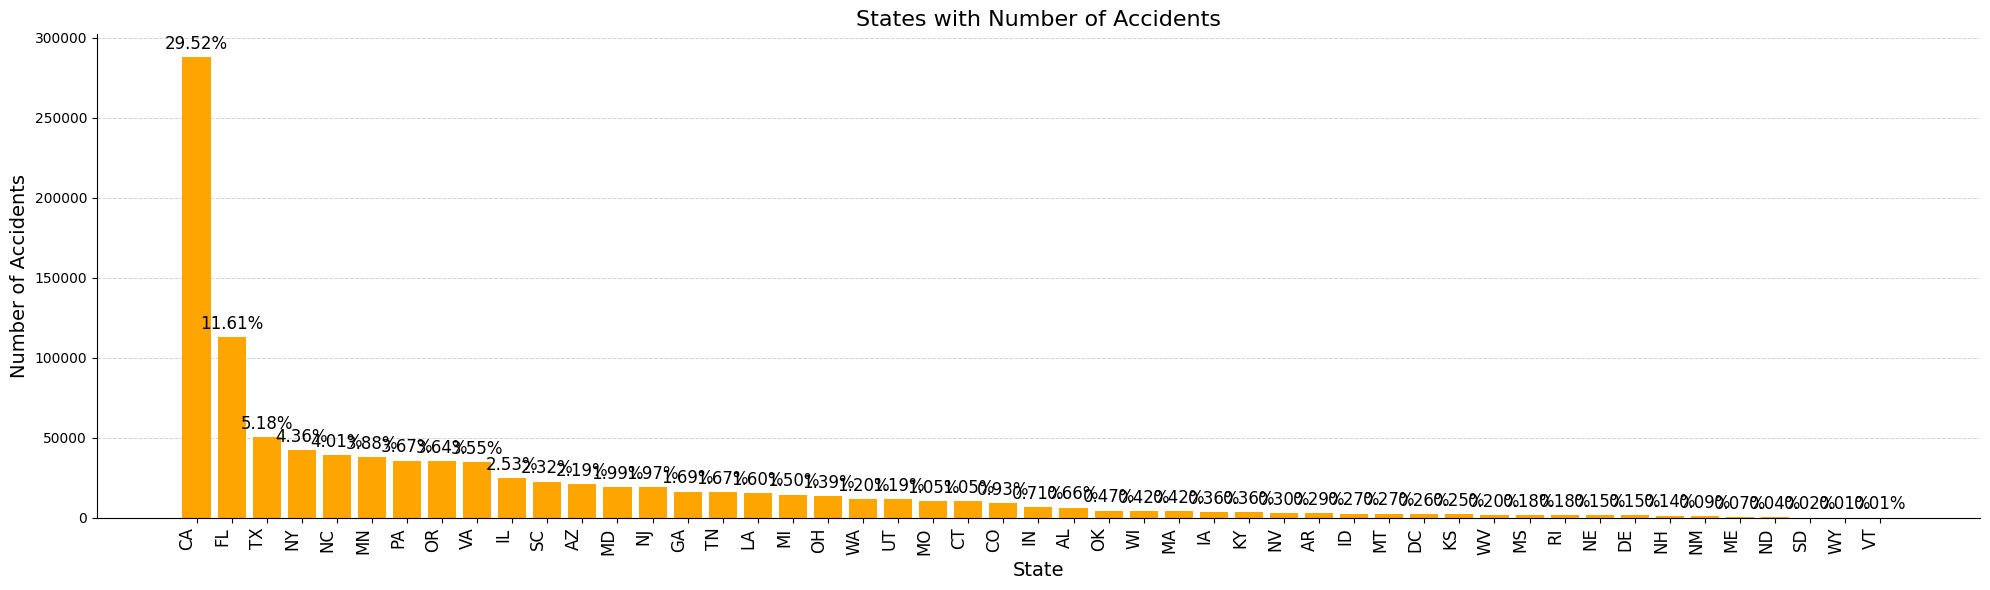

In [23]:
fig, ax = plt.subplots(figsize=(20, 6))
state_counts = accidents['State'].value_counts().sort_values(ascending=False)

total_accidents = len(accidents)
bar_plot = ax.bar(state_counts.index, state_counts.values, color='Orange')

ax.set_xticks(range(len(state_counts.index)))
ax.set_xticklabels(state_counts.index, rotation=90, fontsize=12, ha='right')

ax.set_xlabel('State', fontsize=14)
ax.set_ylabel('Number of Accidents', fontsize=14)
ax.set_title('States with Number of Accidents', fontsize=16)

def add_percentage_labels(rects):
    for rect in rects:
        height = rect.get_height()
        percentage = (height / total_accidents) * 100
        ax.annotate(f'{percentage:.2f}%', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom', fontsize=12, color='black')

add_percentage_labels(bar_plot)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_axisbelow(True)
ax.grid(axis='y', color='lightgrey', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Roughly 30% of all the accident records in the United States over the last five years originated from California alone.The state with the second-highest number of road accidents in the US is Florida, accounting for approximately 11% of the cases.

In [24]:
#Get the average number of accidents in California
#State with highest number of accidents
california_accidents = accidents[accidents['State'] == 'CA']
total_accidents_ca = california_accidents.shape[0]
total_days = (accidents['Start_Time'].max() - accidents['Start_Time'].min()).days + 1
print(total_days)
average_daily_accidents_ca = total_accidents_ca / total_days
print("Average Daily Accidents in California:", average_daily_accidents_ca)

state_accidents_counts = accidents['State'].value_counts()

state_with_least_accidents = state_accidents_counts.idxmin()
least_accidents = state_accidents_counts.min()


total_days = (accidents['Start_Time'].max() - accidents['Start_Time'].min()).days + 1
average_daily_accidents_least_state = least_accidents / total_days

print("State with Least Accidents:", state_with_least_accidents)
print("Total Accidents in the Least State:", least_accidents)
print("Average Daily Accidents in the Least State:", average_daily_accidents_least_state)

1789
Average Daily Accidents in California: 160.89994410285075
State with Least Accidents: VT
Total Accidents in the Least State: 142
Average Daily Accidents in the Least State: 0.07937395192845165


# California has the highest average daily accidents, totalling  around 160.

# VT(Vermont) is the state with least amount of accidents with an average of less than 1 accident per day

In [25]:
#Get total number of unique cities in the dataset
print("City Code: ", accidents.City.unique())
print("Total No. of Cities in Dataset: ", len(accidents.City.unique()))

City Code:  ['Dublin' 'Dayton' 'Cincinnati' ... 'Luxemburg' 'Pelican' 'Pagosa Springs']
Total No. of Cities in Dataset:  9359


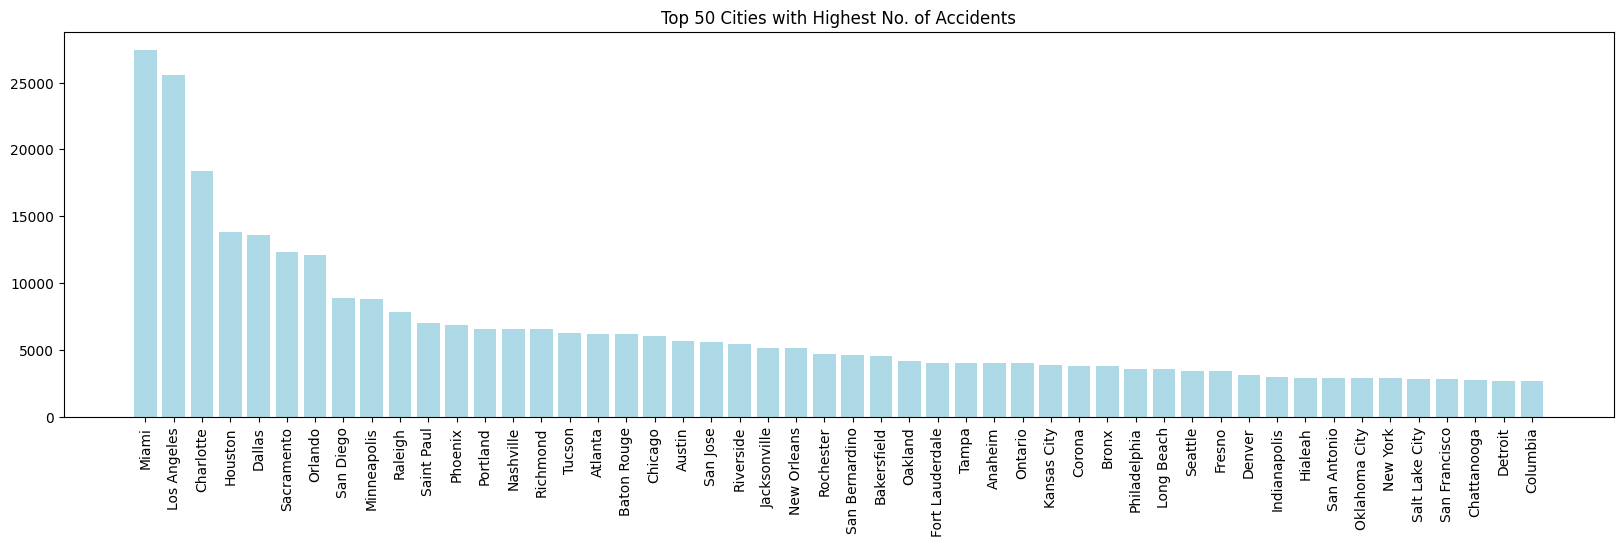

In [26]:
#Cities vs the number of accidents
fig, ax = plt.subplots(figsize=(20, 5))
city_counts = accidents['City'].value_counts().iloc[:50]  # Get the top 50 cities with the highest number of accidents
c = ax.bar(city_counts.index, city_counts.values, color='lightblue')
ax.set_title("Top 50 Cities with Highest No. of Accidents")
ax.set_xticks(range(len(city_counts.index)))
ax.set_xticklabels(city_counts.index, rotation=90)
plt.show()


# 3 of the top ten cities with highest number of accidents are from California

In [27]:
city_accident_counts = accidents['City'].value_counts()
total_accidents = city_accident_counts.sum()
city_accident_percentages = (city_accident_counts / total_accidents) * 100
cities_with_less_than_100_accidents = city_accident_counts[city_accident_counts < 100]
percentage_of_cities_with_less_than_100_accidents = (len(cities_with_less_than_100_accidents) / len(city_accident_counts)) * 100
print("Percentage of cities with less than 100 total road accidents out of all cities:")
print(percentage_of_cities_with_less_than_100_accidents)

Percentage of cities with less than 100 total road accidents out of all cities:
84.89154824233358


# Approximately 84% of the total number of cities in the United States experience fewer than 100 road accidents in total.

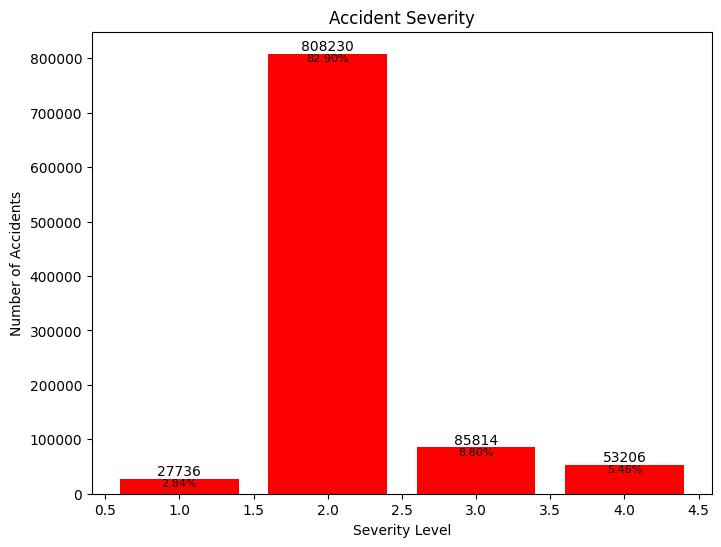

In [28]:
# Count the number of accidents for each severity level
severity_counts = accidents['Severity'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
bars = plt.bar(severity_counts.index, severity_counts.values, color='red')

# adding the count of accidents on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

# adding the percentage of accidents on top of each bar
total_accidents = severity_counts.sum()
for bar in bars:
    yval = bar.get_height()
    percentage = yval / total_accidents * 100
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{percentage:.2f}%', ha='center', va='top', fontsize=8)

plt.title('Accident Severity')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.show()


# Approximately 83% of road accidents resulted in a moderate impact on traffic (Severity-2), while 5% of accidents had a highly severe impact on traffic (Severity-4).

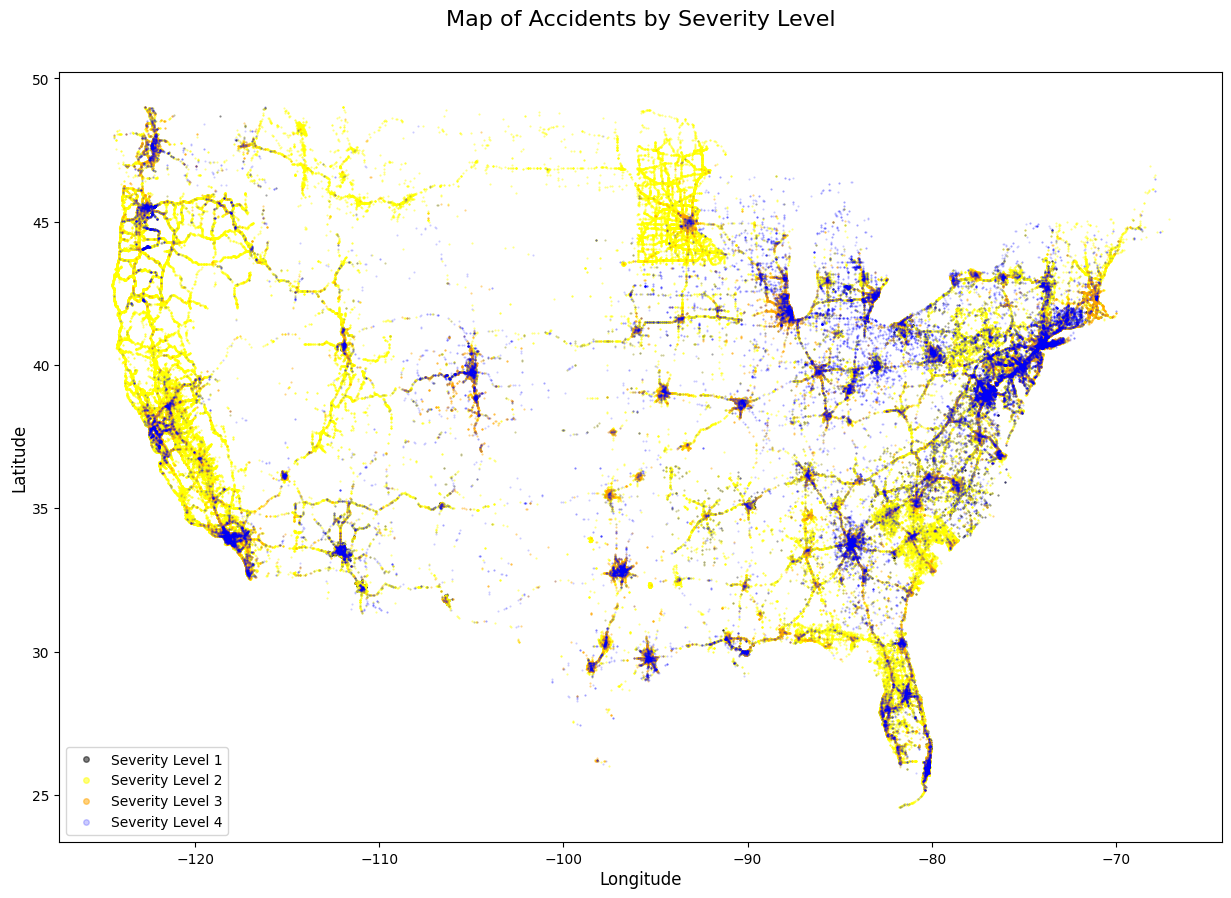

In [29]:
accidents_1 = accidents[accidents['Severity'] == 1]
accidents_2 = accidents[accidents['Severity'] == 2]
accidents_3 = accidents[accidents['Severity'] == 3]
accidents_4 = accidents[accidents['Severity'] == 4]
plt.figure(figsize=(15, 10))
plt.plot('Start_Lng', 'Start_Lat', data=accidents_1, linestyle='', marker='.', markersize=1, color="black", alpha=0.5, label='Severity Level 1')
plt.plot('Start_Lng', 'Start_Lat', data=accidents_2, linestyle='', marker='.', markersize=1, color="yellow", alpha=0.5, label='Severity Level 2')
plt.plot('Start_Lng', 'Start_Lat', data=accidents_3, linestyle='', marker='.', markersize=1, color="orange", alpha=0.5, label='Severity Level 3')
plt.plot('Start_Lng', 'Start_Lat', data=accidents_4, linestyle='', marker='.', markersize=1, color="blue", alpha=0.2, label='Severity Level 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents by Severity Level', size=16, y=1.05)
plt.show()

# Based on the data, it can be observed that a significant majority of accidents have occurred in urban dense areas, cities, and in and around cities.

<ipython-input-30-55726324849c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=timezone_accident_counts.index, y=timezone_accident_counts.values, ax=ax, palette='viridis')


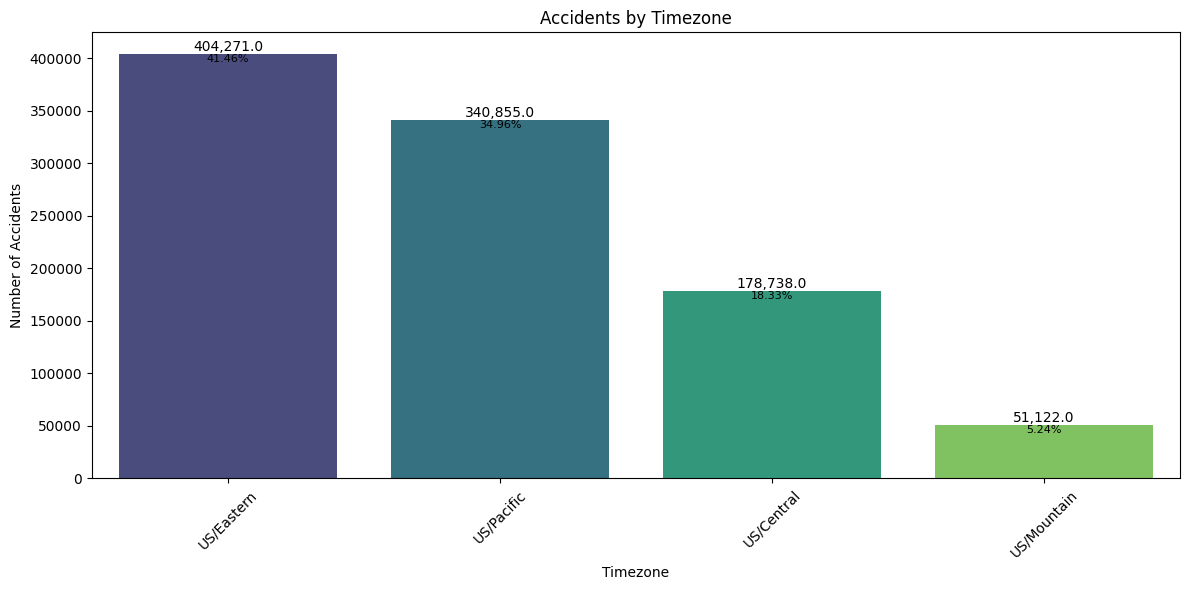

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))
timezone_accident_counts = accidents['Timezone'].value_counts()
sns.barplot(x=timezone_accident_counts.index, y=timezone_accident_counts.values, ax=ax, palette='viridis')
total_accidents = timezone_accident_counts.sum()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)
    percentage = height / total_accidents * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='top', fontsize=8)
ax.set_title("Accidents by Timezone")
ax.set_xlabel("Timezone")
ax.set_ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# The region of the United States in the Eastern time zone has the highest occurrence of road accident cases, accounting for 41% of the total incidents.

In [31]:
#Converting the start time to date time format
#for analysis
accidents.Start_Time = pd.to_datetime(accidents.Start_Time)
accidents['Month'] = accidents['Start_Time'].dt.month
accidents['Year'] = accidents['Start_Time'].dt.year
accidents['Hour'] = accidents['Start_Time'].dt.hour
accidents['Weekday'] = accidents['Start_Time'].dt.weekday

# A new column is generated to represent the duration of each accident by extracting the time information from the 'Start_Time' and 'End_Time' columns.

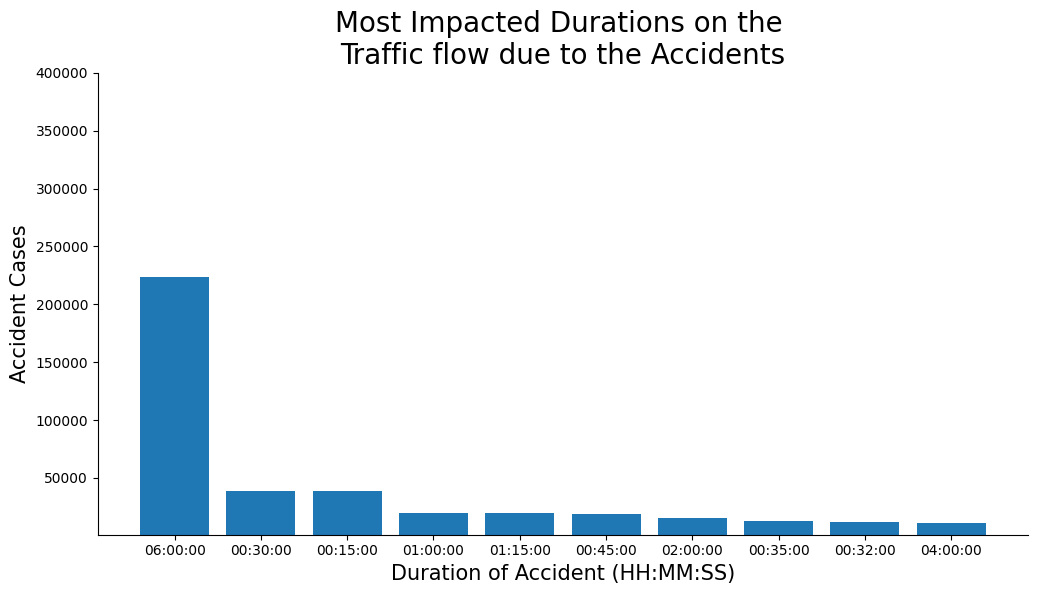

In [32]:
# Creating a new column 'Duration'
accidents['Duration'] = accidents['End_Time'] - accidents['Start_Time']

# Get the top 10 accident durations with corresponding cases
top_10_accident_duration_df = accidents['Duration'].value_counts().head(10).reset_index()
top_10_accident_duration_df.columns = ['Duration', 'Cases']

Duration = [str(i).split('days')[-1].strip() for i in top_10_accident_duration_df['Duration']]
top_10_accident_duration_df['Duration'] = Duration

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(top_10_accident_duration_df['Duration'], top_10_accident_duration_df['Cases'])
ax.set_ylim(1000, 400000)
plt.title('Most Impacted Durations on the \nTraffic flow due to the Accidents', size=20)

ax.set_xlabel('Duration of Accident (HH:MM:SS)', fontsize=15)
ax.set_ylabel('Accident Cases', fontsize=15)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.show()


# From the provided information, it can be inferred that the duration represents the time between the occurrence of the accident and the time it takes for the road to be cleared of all traffic. According to the plot, the majority of road accidents have resulted in a traffic impact lasting for 6 hours.

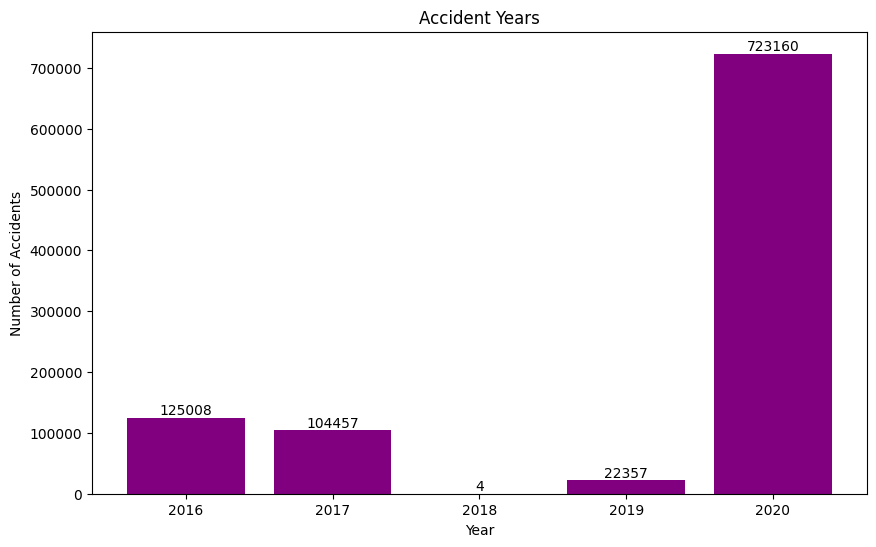

In [33]:
#No of Accidents by Year
year_counts = accidents['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
bars = plt.bar(year_counts.index, year_counts.values,color='purple')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.title('Accident Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()


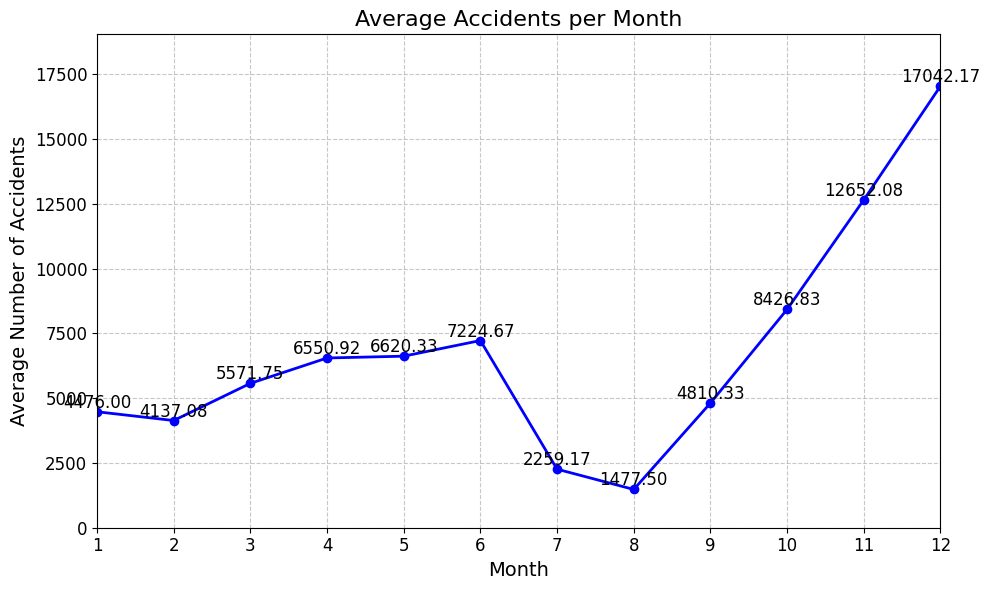

In [34]:
# Calculate the average number of accidents per month
average_accidents_per_month = accidents.groupby('Month')['Month'].count() / accidents['Month'].nunique()
plt.figure(figsize=(10, 6))
plt.plot(average_accidents_per_month.index, average_accidents_per_month.values, marker='o', color='blue', linewidth=2)
# Adding data labels on the data points
for x, y in zip(average_accidents_per_month.index, average_accidents_per_month.values):
    plt.text(x, y, f"{y:.2f}", ha='center', va='bottom', fontsize=12)
plt.title('Average Accidents per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Number of Accidents', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, 13))
plt.xlim(1, 12)
plt.ylim(0, average_accidents_per_month.max() + 2000)
plt.tight_layout()
plt.show()


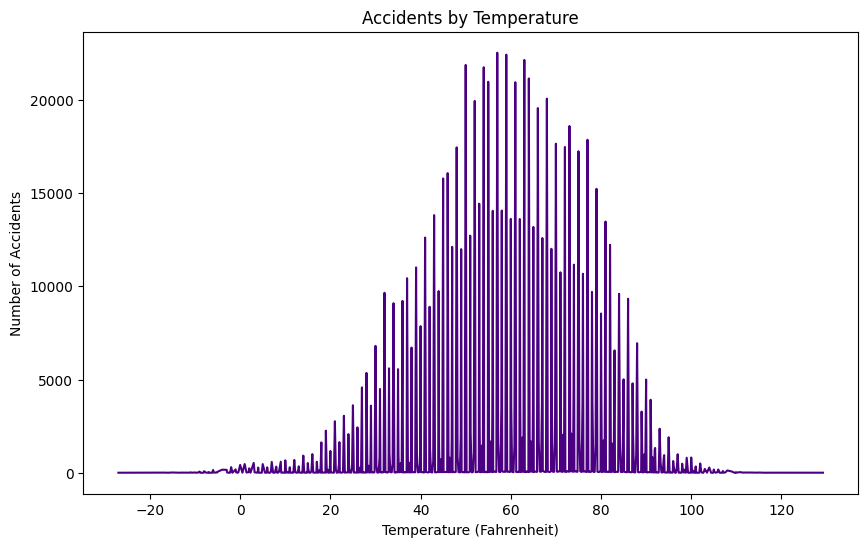

In [35]:
# Count the number of accidents for different temperatures
temperature_counts = accidents['Temperature(F)'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(temperature_counts.index, temperature_counts.values, color='indigo')
plt.title('Accidents by Temperature')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Number of Accidents')
plt.show()

<Axes: xlabel='Month', ylabel='number_of_accidents'>

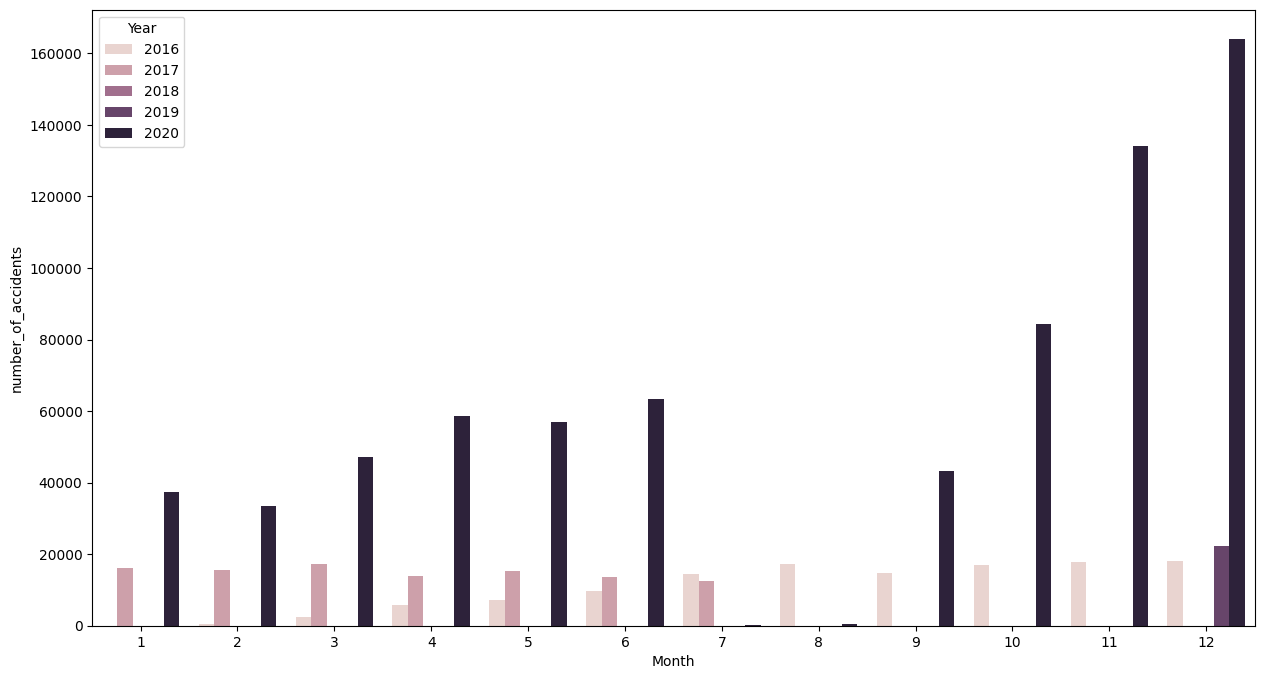

In [36]:
accidents1=accidents
monthly_accidents = accidents1["Month"].value_counts().reset_index()
monthly_accidents.columns = ["Month", "accidents"]

monthly_accidents = accidents1[["Month", "Year"]].value_counts().reset_index()
monthly_accidents.columns = ["Month", "Year", "number_of_accidents"]

plt.figure(figsize=(15, 8))
sns.barplot(x="Month", y="number_of_accidents", hue="Year", data=monthly_accidents)

# The majority of road accidents took place during a specific three-month period, which spans from October to December, representing the transition from Autumn to Winter where temperature is 60 to 80 degrees Fahrenheit

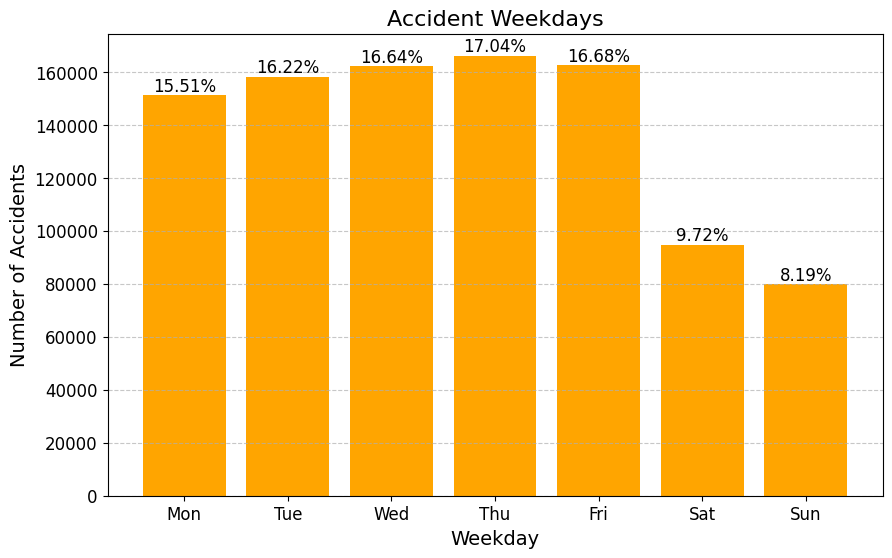

In [37]:
# Count the number of accidents per weekday (0: Monday, 6: Sunday)
weekday_counts = accidents['Weekday'].value_counts().sort_index()

weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 6))
bars = plt.bar(weekday_labels, weekday_counts.values, color='orange')

total_accidents = weekday_counts.sum()

# Adding the percentage of accidents on top of each bar
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_accidents) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{percentage:.2f}%", ha='center', va='bottom', fontsize=12)
plt.title('Accident Weekdays', fontsize=16)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


# The weekdays, which are considered as working days of the week, have the highest percentage of road accidents compared to the weekends, which aligns with our expectations. Approximately 18% of road accident records occurred during the weekend. Among the weekdays, Thursday has the highest percentage of road accidents. On Sundays, the percentage of road accidents in the US is the lowest.

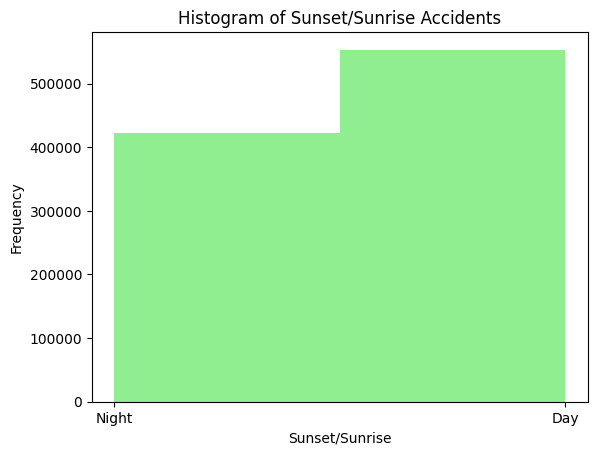

In [38]:
#Number of Accidents during sunrise and sunset
sunrise_sunset = accidents['Sunrise_Sunset']
plt.hist(sunrise_sunset, bins=2, color='lightgreen')
plt.xlabel('Sunset/Sunrise')
plt.ylabel('Frequency')
plt.title('Histogram of Sunset/Sunrise Accidents')
plt.show()

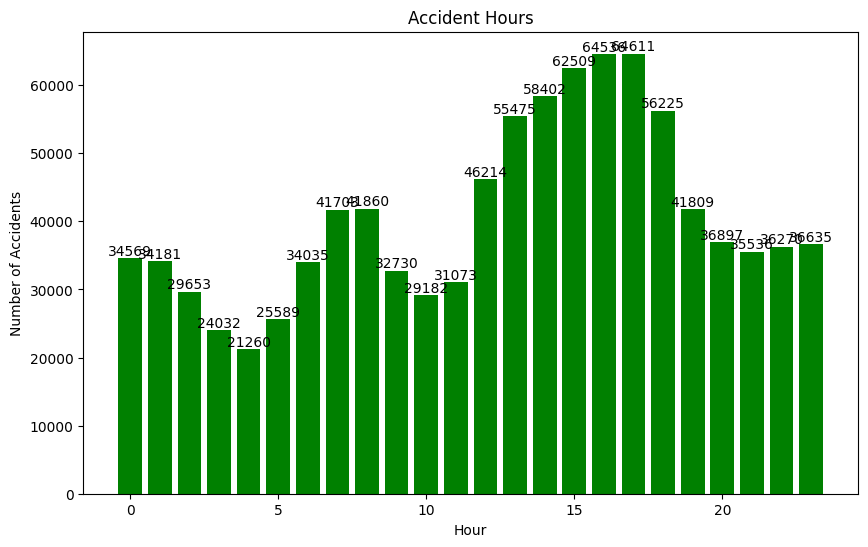

In [39]:
# No of Accidents by Hour
# Count the number of accidents per hour
hour_counts = accidents['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(hour_counts.index, hour_counts.values, color='green')

# adding the count of accidents on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.title('Accident Hours')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

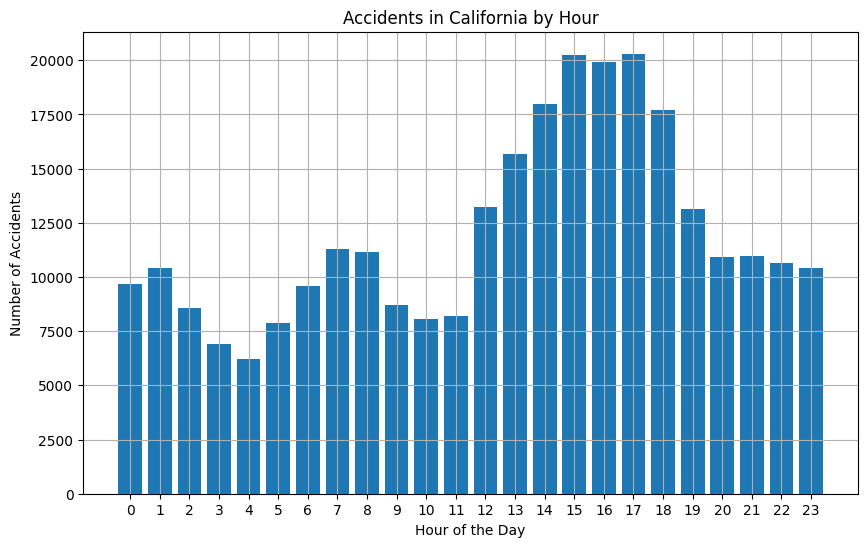

In [40]:
# Filter the original DataFrame to get accidents in California
california_accidents = accidents[accidents['State'] == 'CA']

# Calculate the number of accidents in each hour
hour_counts = california_accidents['Hour'].value_counts().sort_index()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(hour_counts.index, hour_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Accidents in California by Hour')
plt.xticks(range(24))
plt.grid(True)
plt.show()


# The majority of accidents occur during the morning hours (6 am - 8 am) and in the evening (3 pm - 6 pm). This could be attributed to the fact that these periods correspond to peak commuting hours when a significant number of people are heading to or returning from their workplaces.

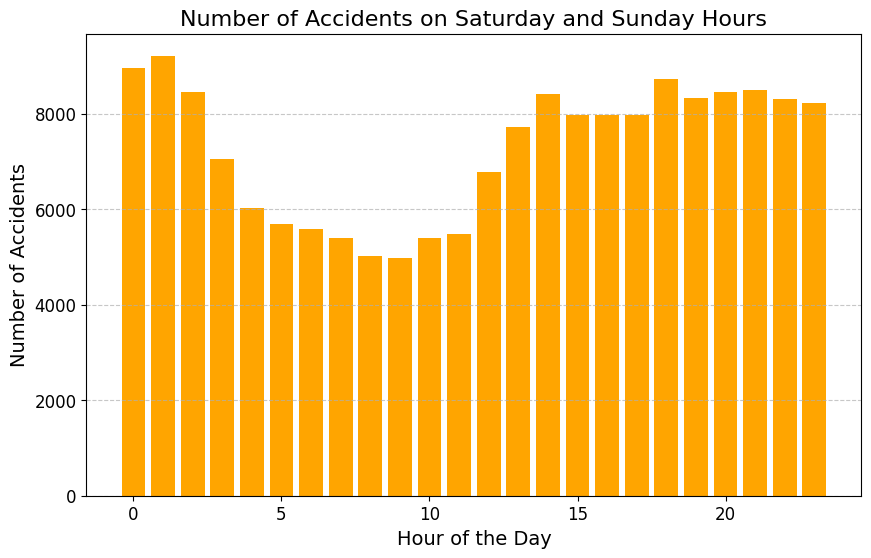

In [41]:
saturday_sunday_accidents = accidents[accidents['Weekday'].isin([5, 6])]

# Count the number of accidents during each hour for Saturday and Sunday
hourly_accidents_counts = saturday_sunday_accidents['Start_Time'].dt.hour.value_counts().sort_index()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(hourly_accidents_counts.index, hourly_accidents_counts.values, color='orange')

plt.title('Number of Accidents on Saturday and Sunday Hours', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# The number of accidents during weekends is nearly half of the average number of accidents on weekdays. This suggests that a significant portion of accidents happens during the daily commute to and from work. Additionally, during weekends, a majority of accidents occur during the late-night hours.

<Figure size 5200x1600 with 0 Axes>

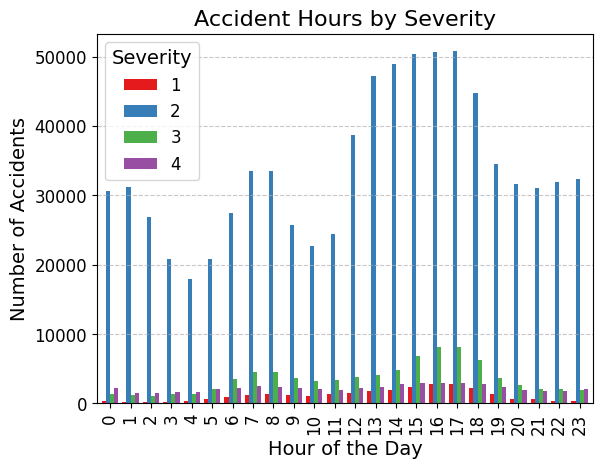

In [42]:
# Group the data by 'hour' and 'Severity' and calculate the counts
hour_severity_counts = accidents.groupby([accidents['Start_Time'].dt.hour, 'Severity'])['Severity'].count().unstack()
# Plot the graph as a grouped bar plot
plt.figure(figsize=(52,16))
hour_severity_counts.plot(kind='bar', width=0.8, color=['#e41a1c', '#377eb8', '#4daf4a', '#984ea3'])
plt.title('Accident Hours by Severity', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(title='Severity', fontsize=12, title_fontsize=14)
plt.show()


# Accidents with high severity are more likely to happen after 3 pm, suggesting a strong possibility that these accidents occur during the evening rush hour when people are likely to be returning home.

In [44]:
accidents['Severity'] = accidents['Severity'].astype(str)

In [45]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974986 entries, 0 to 974985
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   Severity           974986 non-null  object         
 1   Start_Time         974986 non-null  datetime64[ns] 
 2   End_Time           974986 non-null  datetime64[ns] 
 3   Start_Lat          974986 non-null  float64        
 4   Start_Lng          974986 non-null  float64        
 5   End_Lat            974986 non-null  float64        
 6   End_Lng            974986 non-null  float64        
 7   Distance(mi)       974986 non-null  float64        
 8   Description        974986 non-null  object         
 9   Street             974986 non-null  object         
 10  Side               974986 non-null  object         
 11  City               974986 non-null  object         
 12  County             974986 non-null  object         
 13  State              974986 non

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

accidents_classification = accidents.copy()
columns_to_drop = ['Start_Time', 'End_Time', 'Description', 'Street', 'County', 'Year', 'Country', 'Weather_Timestamp']
accidents_classification = accidents_classification[[col for col in accidents_classification.columns if col not in columns_to_drop]]

accidents_classification['Duration'] = accidents_classification['Duration'].dt.total_seconds()

X = accidents_classification.drop('Severity', axis=1)
y = accidents_classification['Severity']

subset_size = 10000
X_subset, _, y_subset, _ = train_test_split(X, y, train_size=subset_size, random_state=42)

X_subset = pd.get_dummies(X_subset, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)

y_pred = model_DT.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy is :", accuracy)


Decision Tree Accuracy is : 0.816


In [47]:
print(accidents_classification.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974986 entries, 0 to 974985
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           974986 non-null  object 
 1   Start_Lat          974986 non-null  float64
 2   Start_Lng          974986 non-null  float64
 3   End_Lat            974986 non-null  float64
 4   End_Lng            974986 non-null  float64
 5   Distance(mi)       974986 non-null  float64
 6   Side               974986 non-null  object 
 7   City               974986 non-null  object 
 8   State              974986 non-null  object 
 9   Timezone           974986 non-null  object 
 10  Temperature(F)     974986 non-null  float64
 11  Wind_Chill(F)      974986 non-null  float64
 12  Humidity(%)        974986 non-null  float64
 13  Visibility(mi)     974986 non-null  float64
 14  Wind_Speed(mph)    974986 non-null  float64
 15  Precipitation(in)  974986 non-null  float64
 16  We

In [48]:
sample_data = {
    'Start_Lat': [-40.09],
    'Start_Lng': [-83.09],
    'End_Lat': [-40.6],
    'End_Lng': [-83.031],
    'Distance(mi)': [3.230],
    'Side': ['R'],
    'City': ['Dallas'],
    'State': ['TX'],
    'Timezone': ['US/Central'],
    'Temperature(F)': [20.0],
    'Wind_Chill(F)': [74.0],
    'Humidity(%)': [30],
    'Visibility(mi)': [10.0],
    'Wind_Speed(mph)': [5.0],
    'Precipitation(in)': [0.0],
    'Weather_Condition': ['Clear'],
    'Crossing': [False],
    'Junction': [False],
    'Railway': [False],
    'Station': [False],
    'Stop': [False],
    'Traffic_Signal': [False],
    'Sunrise_Sunset': ['Day'],
    'Duration': [300000.0], # in seconds
    'Month': [12],
    'Hour': [2],
    'Weekday': [7],
}



# Convert the dictionary to a DataFrame
sample_df = pd.DataFrame(sample_data)



# Apply the same one-hot encoding used in training
sample_df = pd.get_dummies(sample_df, drop_first=True)
missing_columns = {col: 0 for col in X_subset.columns if col not in sample_df.columns}
missing_columns_df = pd.DataFrame(missing_columns, index=sample_df.index)
sample_df = pd.concat([sample_df, missing_columns_df], axis=1)
sample_df = sample_df[X_subset.columns]
sample_prediction = model_DT.predict(sample_df)
print("Predicted Severity:", sample_prediction[0])

Predicted Severity: 4


In [49]:
plt.figure(figsize=(200, 100))
plot_tree(model_DT, feature_names=X_subset.columns, class_names=model_DT.classes_, filled=True, rounded=True)
plt.show()

# Inferences:

# - California has a high number of accidents.
# - Most accidents are of moderate severity.
# - Accidents peak during commuting hours and on weekdays (especially Thursdays).
# - Eastern Timezone has the most accidents.
# - High severity accidents are more likely in the evening.
# - Accidents are frequent Oct-Dec, 60-80 degrees Fahrenheit.
# - A decision tree model was built to predict severity.

In [ ]:
# prompt: Help me create a very small readme file for this project

# US Accidents Exploratory Data Analysis and Prediction

This project analyzes a dataset of US accidents to identify patterns and trends.  Key findings include:

* **Geographic Distribution:**  A high concentration of accidents in California and urban areas.
* **Severity:** Most accidents are of moderate severity, with a notable percentage of severe incidents.
* **Time of Day:**  Accidents peak during morning and evening commutes, with a different pattern on weekends.
* **Day of Week:**  Weekdays show a higher accident frequency than weekends, with Thursday having the peak.
* **Environmental Factors:**  Relationship between accidents and temperature and time of year.
* **Predictive Modeling:** A decision tree model is trained to predict accident severity based on various features.


The project utilizes Python libraries including Pandas, Matplotlib, Seaborn, and Scikit-learn.
